In [179]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dont-overfit-i/sample_submission.csv
/kaggle/input/dont-overfit-i/train.csv
/kaggle/input/dont-overfit-i/test.csv
/kaggle/input/dont-overfit-ii/sample_submission.csv
/kaggle/input/dont-overfit-ii/train.csv
/kaggle/input/dont-overfit-ii/test.csv


In [180]:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [181]:
train = pd.read_csv('/kaggle/input/dont-overfit-i/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-i/test.csv')
submission=pd.read_csv('/kaggle/input/dont-overfit-i/sample_submission.csv')

# train.shape, test.shape, submission.shape

y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

# 1. Data Cleaning & Preparation

In [182]:
train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-0.098,2.165,0.681,-0.614,1.309,-0.455,-0.236,0.276,...,0.867,1.347,0.504,-0.649,0.672,-2.097,1.051,-0.414,1.038,-1.065
1,1,0.0,1.081,-0.973,-0.383,0.326,-0.428,0.317,1.172,0.352,...,-0.165,-1.695,-1.257,1.359,-0.808,-1.624,-0.458,-1.099,-0.936,0.973
2,2,1.0,-0.523,-0.089,-0.348,0.148,-0.022,0.404,-0.023,-0.172,...,0.013,0.263,-1.222,0.726,1.444,-1.165,-1.544,0.004,0.800,-1.211
3,3,1.0,0.067,-0.021,0.392,-1.637,-0.446,-0.725,-1.035,0.834,...,-0.404,0.640,-0.595,-0.966,0.900,0.467,-0.562,-0.254,-0.533,0.238
4,4,1.0,2.347,-0.831,0.511,-0.021,1.225,1.594,0.585,1.509,...,0.898,0.134,2.415,-0.996,-1.006,1.378,1.246,1.478,0.428,0.253


In [183]:
test.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.500,-1.033,-1.595,0.309,-0.714,0.502,0.535,-0.129,-0.687,1.291,...,-0.088,-2.628,-0.845,2.078,-0.277,2.132,0.609,-0.104,0.312,0.979
1,0.776,0.914,-0.494,1.347,-0.867,0.480,0.578,-0.313,0.203,1.356,...,-0.683,-0.066,0.025,0.606,-0.353,-1.133,-3.138,0.281,-0.625,-0.761
2,1.750,0.509,-0.057,0.835,-0.476,1.428,-0.701,-2.009,-1.378,0.167,...,-0.094,0.351,-0.607,-0.737,-0.031,0.701,0.976,0.135,-1.327,2.463
3,-0.556,-1.855,-0.682,0.578,1.592,0.512,-1.419,0.722,0.511,0.567,...,-0.336,-0.787,0.255,-0.031,-0.836,0.916,2.411,1.053,-1.601,-1.529
4,0.754,-0.245,1.173,-1.623,0.009,0.370,0.781,-1.763,-1.432,-0.930,...,2.184,-1.090,0.216,1.186,-0.143,0.322,-0.068,-0.156,-1.153,0.825


In [184]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Columns: 302 entries, id to 299
dtypes: float64(301), int64(1)
memory usage: 590.0 KB


In [185]:
train.isnull().any().any()

False

In [186]:
train.duplicated().sum()

0

In [187]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.640000,0.023292,-0.026872,0.167404,0.001904,0.001588,-0.007304,0.032052,0.078412,...,0.044652,0.126344,0.018436,-0.012092,-0.065720,-0.106112,0.046472,0.006452,0.009372,-0.128952
std,72.312977,0.480963,0.998354,1.009314,1.021709,1.011751,1.035411,0.955700,1.006657,0.939731,...,1.011416,0.972567,0.954229,0.960630,1.057414,1.038389,0.967661,0.998984,1.008099,0.971219
min,0.000000,0.000000,-2.319000,-2.931000,-2.477000,-2.359000,-2.566000,-2.845000,-2.976000,-3.444000,...,-2.804000,-2.443000,-2.757000,-2.466000,-3.287000,-3.072000,-2.634000,-2.776000,-3.211000,-3.500000
25%,62.250000,0.000000,-0.644750,-0.739750,-0.425250,-0.686500,-0.659000,-0.643750,-0.675000,-0.550750,...,-0.617000,-0.510500,-0.535750,-0.657000,-0.818500,-0.821000,-0.605500,-0.751250,-0.550000,-0.754250
50%,124.500000,1.000000,-0.015500,0.057000,0.184000,-0.016500,-0.023000,0.037500,0.060500,0.183500,...,0.067500,0.091000,0.057500,-0.021000,-0.009000,-0.079500,0.009500,0.005500,-0.009000,-0.132500
75%,186.750000,1.000000,0.677000,0.620750,0.805000,0.720000,0.735000,0.660500,0.783250,0.766250,...,0.797250,0.804250,0.631500,0.650250,0.739500,0.493000,0.683000,0.794250,0.654250,0.503250
max,249.000000,1.000000,2.567000,2.419000,3.392000,2.771000,2.901000,2.793000,2.546000,2.846000,...,2.865000,2.801000,2.736000,2.596000,2.226000,3.131000,3.236000,2.626000,3.530000,2.771000


In [188]:
train['target'].value_counts()

target
1.0    160
0.0     90
Name: count, dtype: int64

## 1.1 Statistics Analysis

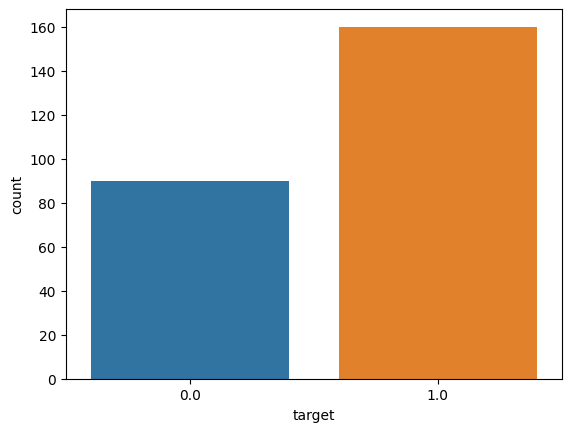

In [189]:
p = sns.countplot(data=train, x="target")
plt.show()

### Balance the dataset with synthetic samples using SMOTE
reference: https://www.kaggle.com/code/rafjaa/resampling-strategies-for-imbalanced-datasets

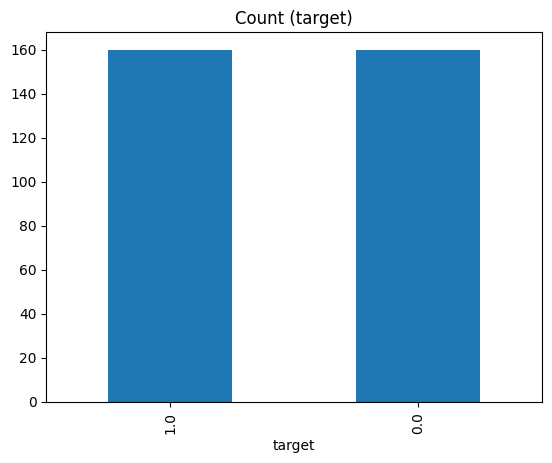

In [190]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority', n_jobs=-1)
X_sm, y_sm = smote.fit_resample(X, train['target'])

df = pd.DataFrame(X_sm)
df['target'] = y_sm

df['target'].value_counts().plot(kind='bar', title='Count (target)');

Text(0, 0.5, 'Frequency')

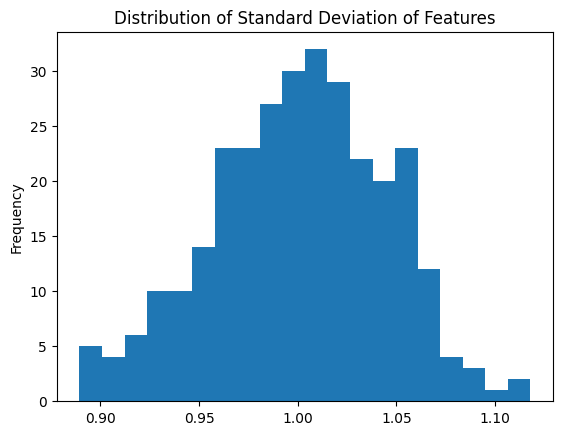

In [191]:
std_values = train[train.columns[2:]].std()
plt.hist(std_values, bins=20)
plt.title('Distribution of Standard Deviation of Features')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

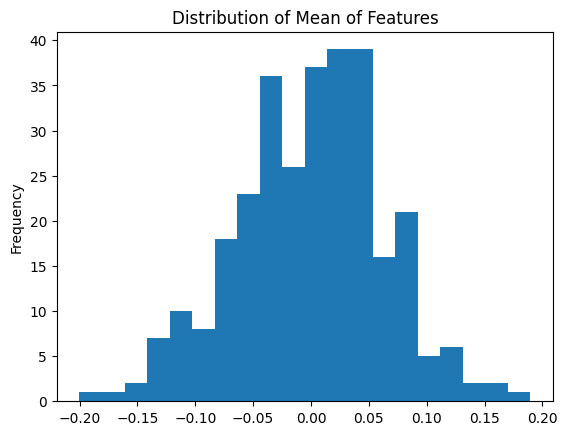

In [192]:
mean_values = train[train.columns[2:]].mean()
plt.hist(mean_values, bins=20)
plt.title('Distribution of Mean of Features')
plt.ylabel('Frequency')

Distributions of random 28 columns


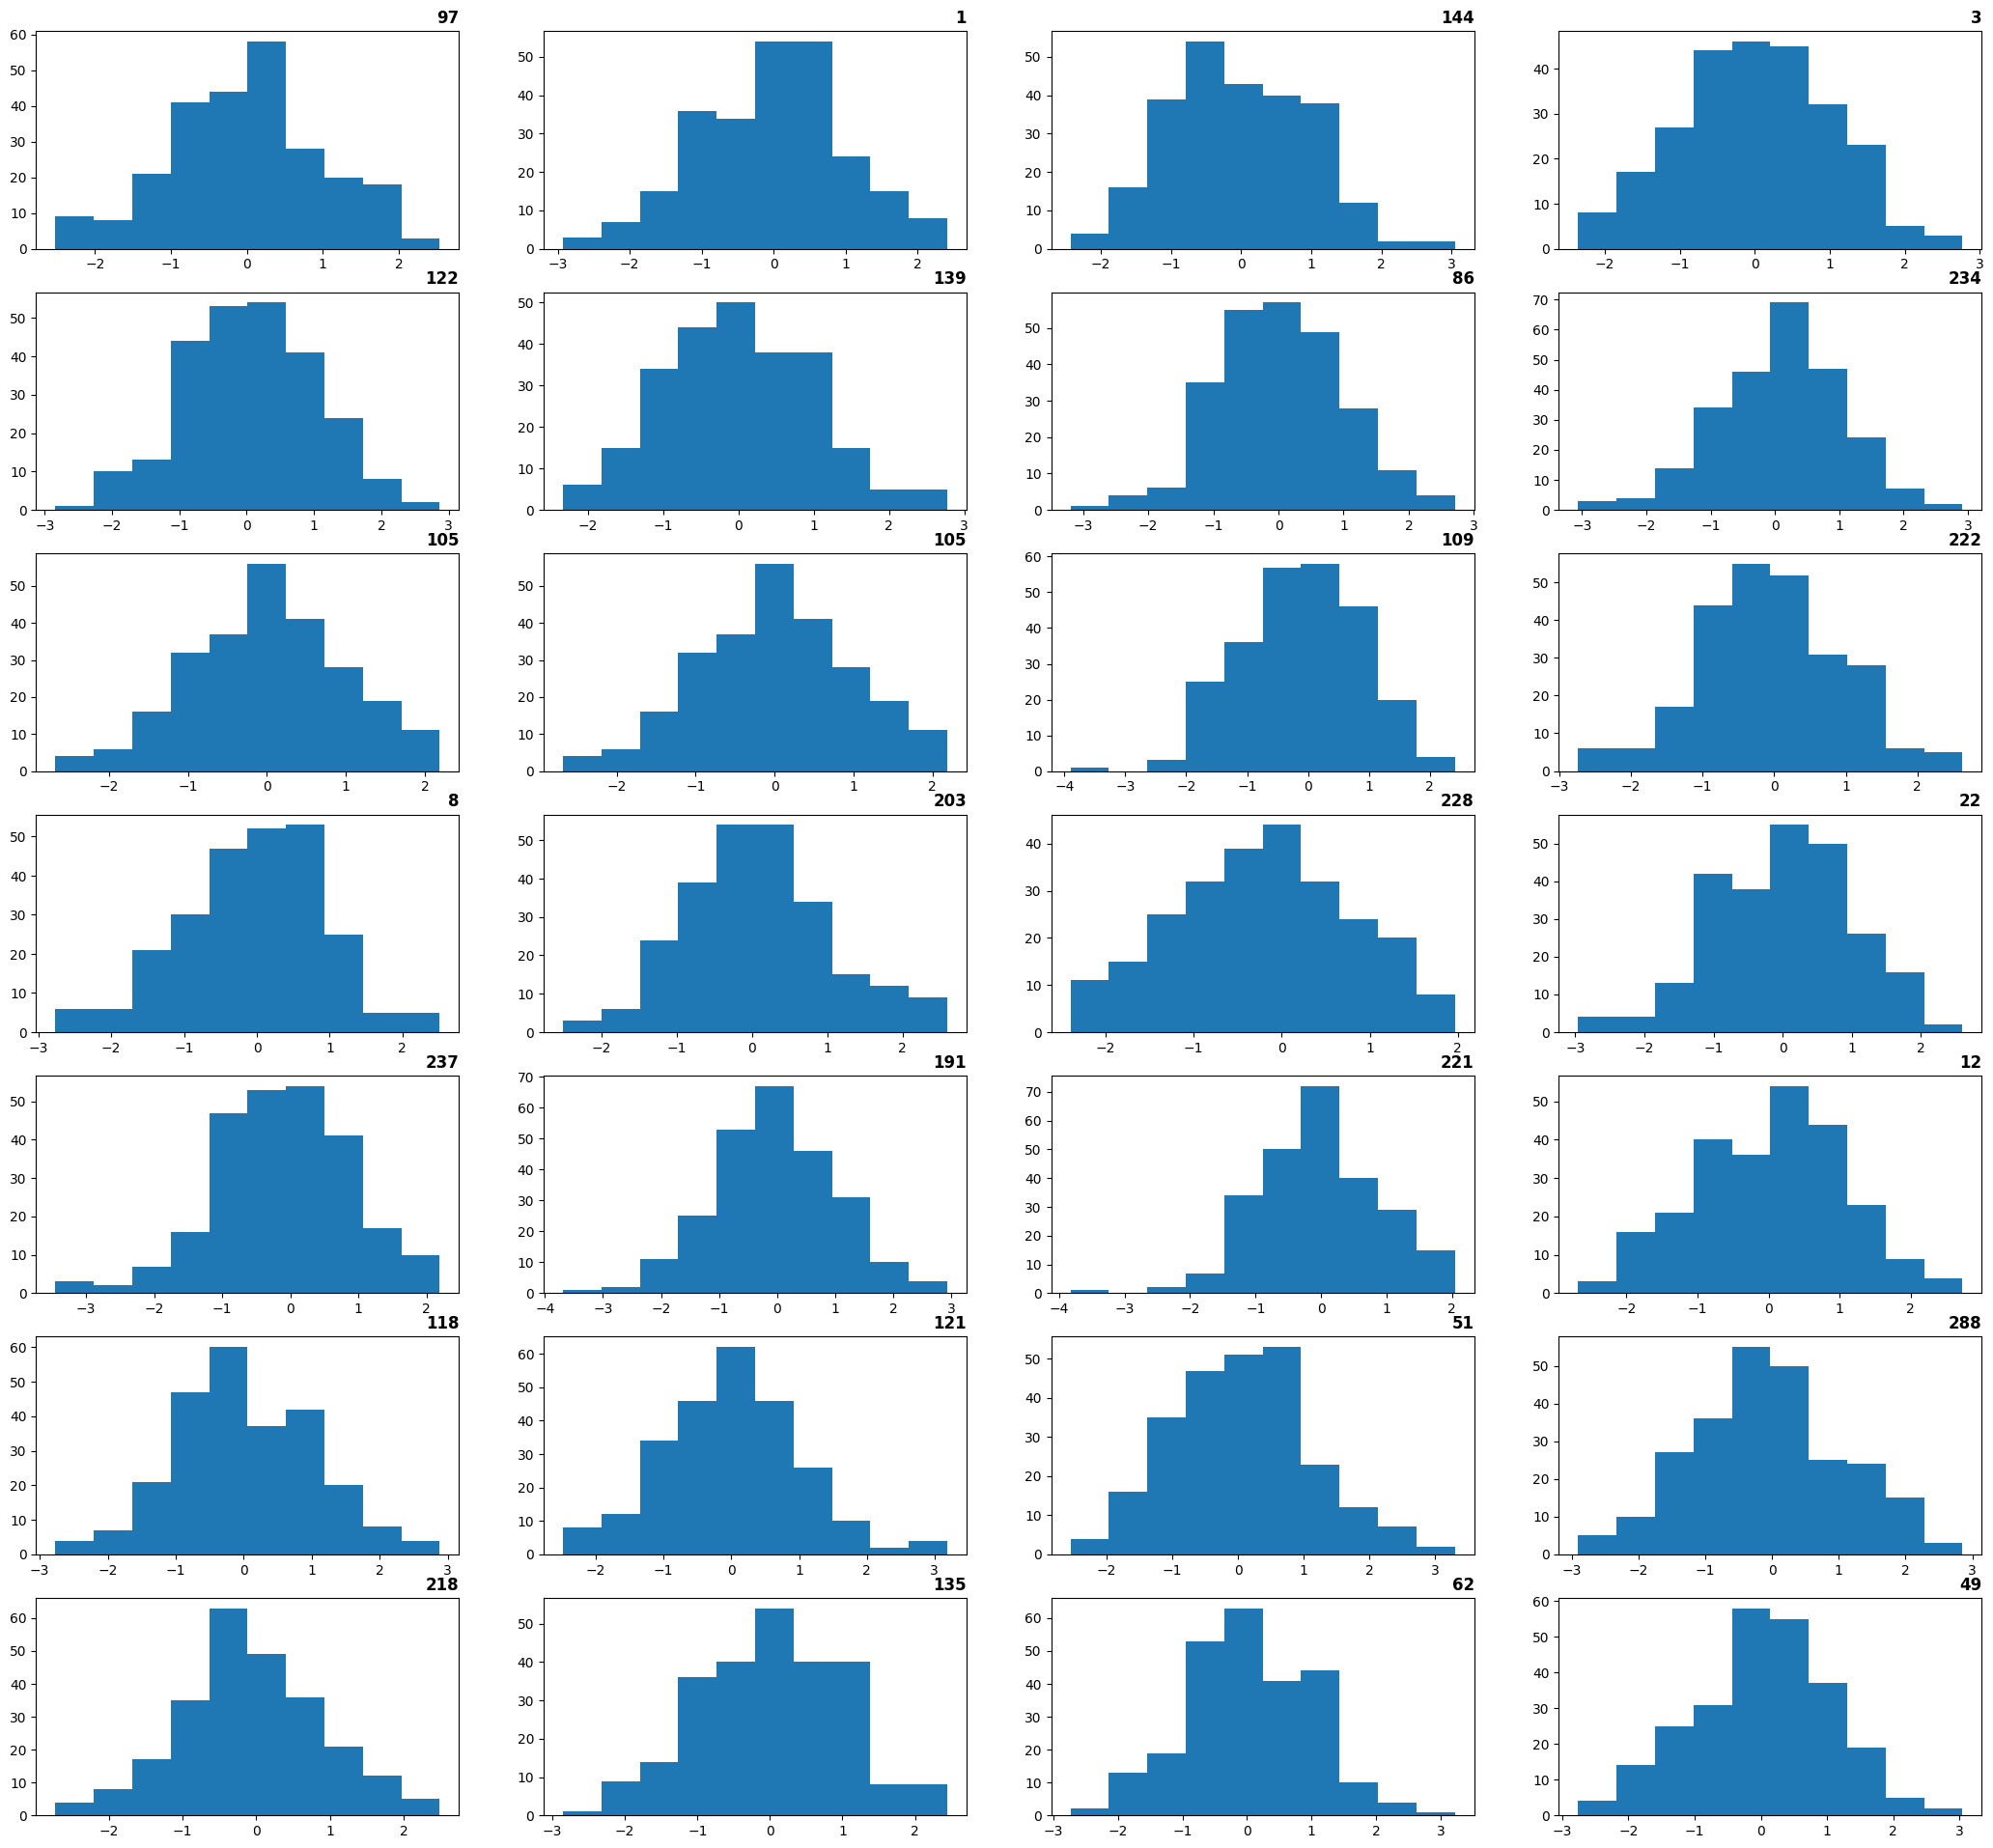

In [193]:
print('Distributions of random 28 columns')
plt.figure(figsize=(26, 24))

random_col = np.random.choice(list(train.columns), 28)

for i, col in enumerate(random_col):
    plt.subplot(7, 4, i + 1)
    plt.hist(train[col])
    plt.title(col, loc='right', fontsize=12, fontweight='bold')

## 1.2 feature Analysis

In [194]:
train_temp = train.drop(['id'], axis=1)
train_temp.corr()

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
target,1.000000,0.108966,-0.073319,-0.015141,0.011549,-0.114726,-0.050329,-0.057063,0.004239,-0.048443,...,0.039675,0.055694,-0.088930,-0.034363,-0.031964,-0.170501,0.007434,0.056810,-0.134760,-0.075475
0,0.108966,1.000000,-0.003871,-0.010487,-0.047819,0.013967,0.070091,-0.022537,0.002832,-0.060031,...,-0.023230,0.053416,-0.143668,-0.007530,-0.060824,-0.024839,-0.051288,0.029143,0.065951,0.038523
1,-0.073319,-0.003871,1.000000,0.013573,-0.018884,0.086743,-0.028023,-0.032914,-0.066416,-0.027201,...,-0.006300,-0.077365,-0.021583,-0.054171,-0.046174,0.042820,-0.127499,0.065883,0.055470,-0.056612
2,-0.015141,-0.010487,0.013573,1.000000,-0.031620,0.088980,-0.050191,0.024674,0.035260,-0.000094,...,-0.111172,-0.027842,-0.013653,-0.009691,-0.051292,-0.028690,-0.071835,0.069395,0.083946,0.025507
3,0.011549,-0.047819,-0.018884,-0.031620,1.000000,0.025255,0.172058,0.157954,-0.018158,0.058736,...,-0.114505,0.029415,0.129069,0.096159,-0.027793,-0.005016,0.034551,0.089963,-0.066438,-0.010770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,-0.170501,-0.024839,0.042820,-0.028690,-0.005016,-0.050318,0.026868,-0.023192,0.032648,0.017297,...,-0.030738,-0.020251,0.015083,-0.139025,-0.015920,1.000000,-0.072721,-0.036572,-0.034341,0.097052
296,0.007434,-0.051288,-0.127499,-0.071835,0.034551,-0.030017,0.070294,0.036903,-0.006235,-0.071254,...,0.016047,0.042079,-0.045879,-0.011766,0.125693,-0.072721,1.000000,-0.002007,0.056297,0.040264
297,0.056810,0.029143,0.065883,0.069395,0.089963,0.029747,0.069243,0.037912,0.014628,0.009224,...,0.048496,0.066474,-0.025382,0.021148,-0.103255,-0.036572,-0.002007,1.000000,0.039793,-0.141078
298,-0.134760,0.065951,0.055470,0.083946,-0.066438,-0.008517,-0.048009,0.171640,-0.031094,-0.000516,...,-0.125556,0.087400,0.008096,-0.005422,-0.063242,-0.034341,0.056297,0.039793,1.000000,-0.092017


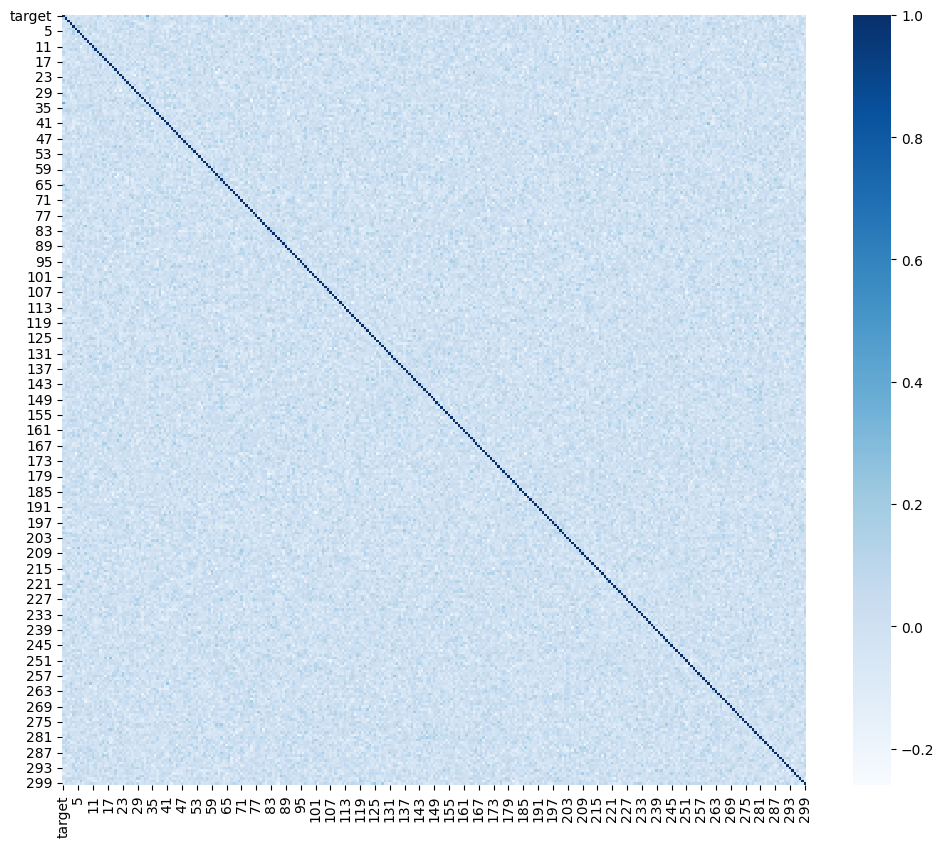

In [195]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(train_temp.corr(), ax=ax,  cmap='Blues')
plt.show()

In [196]:
# extract important feature from correlation
corr_matrix = train_temp.corr()
target_corr = corr_matrix['target'].abs().sort_values(ascending=False)
top_10_features = target_corr.head(11).index
top_corr_matrix = train_temp[top_10_features].corr()
top_corr_matrix

,target,33,65,217,117,91,24,295,73,183,80
target,1.000000,0.373608,0.293846,-0.207215,-0.197496,-0.192536,0.173096,-0.170501,-0.167557,0.164146,-0.162558
33,0.373608,1.000000,0.080415,-0.014277,-0.035177,-0.059426,0.176917,0.035106,-0.032916,0.086041,-0.021728
65,0.293846,0.080415,1.000000,-0.048587,0.049378,-0.041481,0.013329,-0.137809,0.057282,0.077018,-0.087727
217,-0.207215,-0.014277,-0.048587,1.000000,-0.018358,-0.113086,-0.058210,0.076786,0.031125,0.023855,0.059748
117,-0.197496,-0.035177,0.049378,-0.018358,1.000000,-0.010950,-0.159749,0.127442,0.045906,0.013758,0.039128
91,-0.192536,-0.059426,-0.041481,-0.113086,-0.010950,1.000000,-0.198709,-0.031105,-0.031081,-0.081749,0.038138
24,0.173096,0.176917,0.013329,-0.058210,-0.159749,-0.198709,1.000000,0.036107,0.077431,-0.042095,-0.019030
295,-0.170501,0.035106,-0.137809,0.076786,0.127442,-0.031105,0.036107,1.000000,-0.027769,0.043212,-0.002764
73,-0.167557,-0.032916,0.057282,0.031125,0.045906,-0.031081,0.077431,-0.027769,1.000000,-0.090365,0.051460
183,0.164146,0.086041,0.077018,0.023855,0.013758,-0.081749,-0.042095,0.043212,-0.090365,1.000000,0.009057


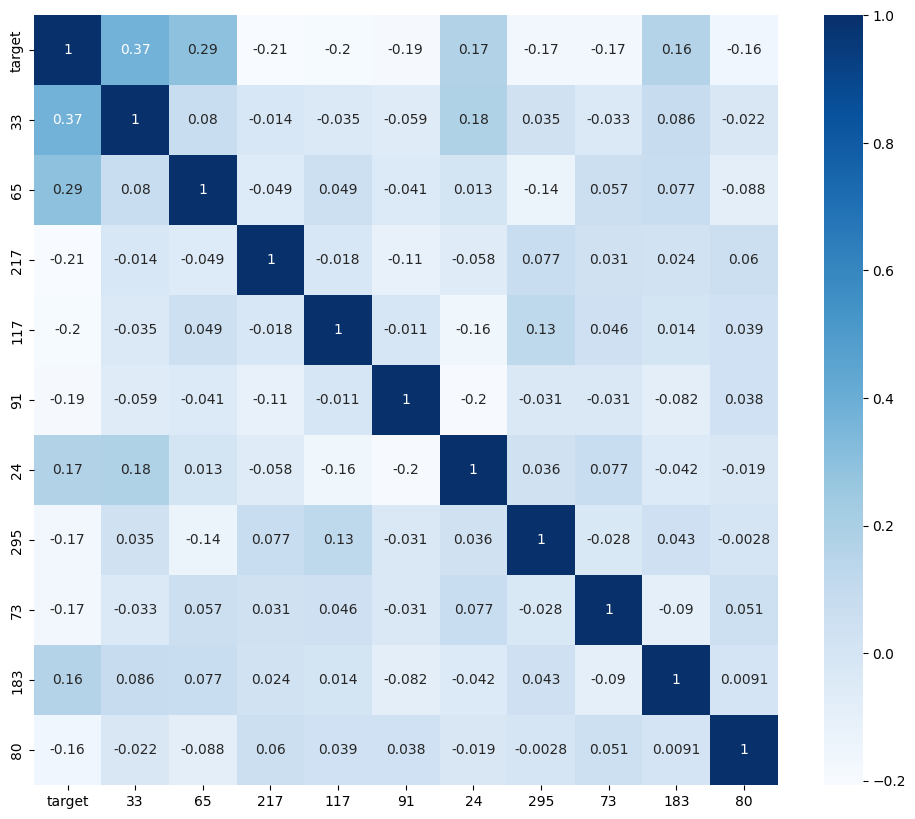

In [197]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(top_corr_matrix, ax=ax, annot=True, cmap='Blues')
plt.show()

In [198]:
train_top10 = train_temp[top_10_features]
train_top10.shape

(250, 11)

# 2. Feature Engineering

In [199]:
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from imblearn.over_sampling import SMOTE

### 2.1 Creating statistics features: mean+std

In [207]:
# create feature: mean + std
train = pd.read_csv('/kaggle/input/dont-overfit-i/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-i/test.csv')


y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

X_train = X
X_test = test
y_train = y
# X_train['300'] = X_train.std(1)
# X_test['300'] = X_test.std(1)
# X_train['301'] = X_train.mean(1)
# X_test['301'] = X_test.mean(1)

In [208]:
X_train.shape, X_test.shape, y_train.shape

((250, 300), (19750, 300), (250,))

### 2.2 Feature Transformation: Standard Scalar

In [209]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_scaled = X_scaler
y_train_scaled = y
X_test_scaled = test

In [210]:
X_train.shape, X_test.shape, y_train.shape, X_train_scaled.shape, y_train_scaled.shape,X_test_scaled.shape

((250, 300), (19750, 300), (250,), (250, 300), (250,), (19750, 300))

### 2.3 Feature Selection: Random Forest

In [ ]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestClassifier
# feature_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
# X_train = feature_selector.fit_transform(X_train, y_train)
# X_test = feature_selector.transform(X_test)

In [ ]:
# X_train.shape, X_test.shape, y_train.shape

### 2.4 Reduce Dimensionality - PCA

In [ ]:
# # retaining 95% of variance
# from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95, random_state=42)
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

In [ ]:
# X_train_pca.shape, X_test_pca.shape, y_train.shape

# 3. Modelling Expectation for train dataset, split into train and validation set

In [211]:
from sklearn.model_selection import KFold, cross_val_score

from sklearn.linear_model import LogisticRegression, Lasso, SGDClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, roc_auc_score

## 3.1 train multiple models and evaluate them

In [214]:
# Train multiple models and evaluate them
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2', class_weight='balanced', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42),
    'SVM': SVC(C=1.0, kernel='rbf', class_weight='balanced', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
    'Gaussian NB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'SGDClassifier': SGDClassifier(max_iter=1000, tol=1e-3, class_weight='balanced', random_state=42)
}

kf = KFold(n_splits=20, shuffle=True, random_state=42)

# Store AUC scores for plotting
model_auc_scores = {}
model_roc_curves = {}

for model_name, model in models.items():
    auc_scores = []
    all_fpr = []
    all_tpr = []
    
    for train_index, val_index in kf.split(X_train_scaled):
        # Split the data
        X_kf_train, X_kf_val = X_train_scaled[train_index], X_train_scaled[val_index]
        y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
        
        # Fit the model
        model.fit(X_kf_train, y_kf_train)
        
        # Obtain prediction probabilities
        if hasattr(model, 'predict_proba'):
            y_kf_val_pred_prob = model.predict_proba(X_kf_val)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_kf_val_pred_prob = model.decision_function(X_kf_val)
        else:
            y_kf_val_pred_prob = model.predict(X_kf_val)  # Use predictions directly if no proba or decision function

        # Calculate AUC score
        auc_scores.append(roc_auc_score(y_kf_val, y_kf_val_pred_prob))
        
        # Store FPR and TPR for ROC curve
        fpr, tpr, _ = roc_curve(y_kf_val, y_kf_val_pred_prob)
        all_fpr.append(fpr)
        all_tpr.append(tpr)
    
    # Calculate mean and standard deviation of AUC
    mean_auc = np.mean(auc_scores)
    std_auc = np.std(auc_scores)
    model_auc_scores[model_name] = (mean_auc, std_auc)
    
    # Store average ROC curve data
    model_roc_curves[model_name] = (all_fpr, all_tpr)

    print(f"K-Fold ROC AUC Score ({model_name}): {mean_auc:.4f} (+/- {std_auc:.4f})")

K-Fold ROC AUC Score (Logistic Regression): 0.8010 (+/- 0.1269)
K-Fold ROC AUC Score (Random Forest): 0.7201 (+/- 0.1347)
K-Fold ROC AUC Score (Gradient Boosting): 0.7052 (+/- 0.1627)
K-Fold ROC AUC Score (SVM): 0.7616 (+/- 0.1720)
K-Fold ROC AUC Score (KNN): 0.5783 (+/- 0.2084)
K-Fold ROC AUC Score (Decision Tree): 0.5842 (+/- 0.1465)
K-Fold ROC AUC Score (Gaussian NB): 0.7626 (+/- 0.1292)
K-Fold ROC AUC Score (AdaBoost): 0.6996 (+/- 0.1935)
K-Fold ROC AUC Score (Lasso): 0.7882 (+/- 0.1550)
K-Fold ROC AUC Score (SGDClassifier): 0.7440 (+/- 0.1351)


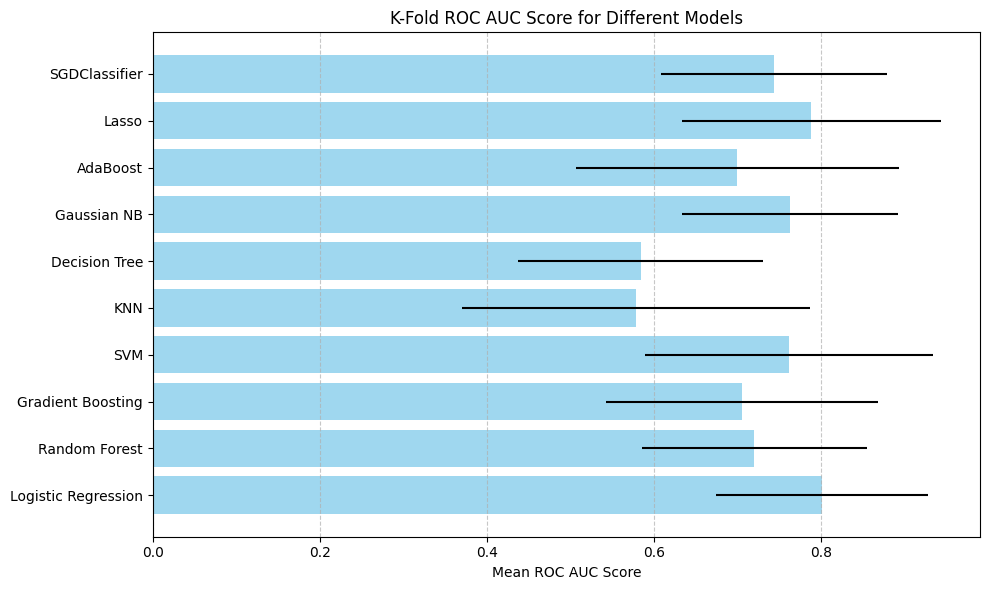

In [215]:
# Plotting K-Fold ROC AUC Scores as a Bar Chart
plt.figure(figsize=(10, 6))
model_names = list(model_auc_scores.keys())
mean_aucs = [model_auc_scores[name][0] for name in model_names]
std_aucs = [model_auc_scores[name][1] for name in model_names]

plt.barh(model_names, mean_aucs, xerr=std_aucs, color='skyblue', alpha=0.8)
plt.xlabel('Mean ROC AUC Score')
plt.title('K-Fold ROC AUC Score for Different Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

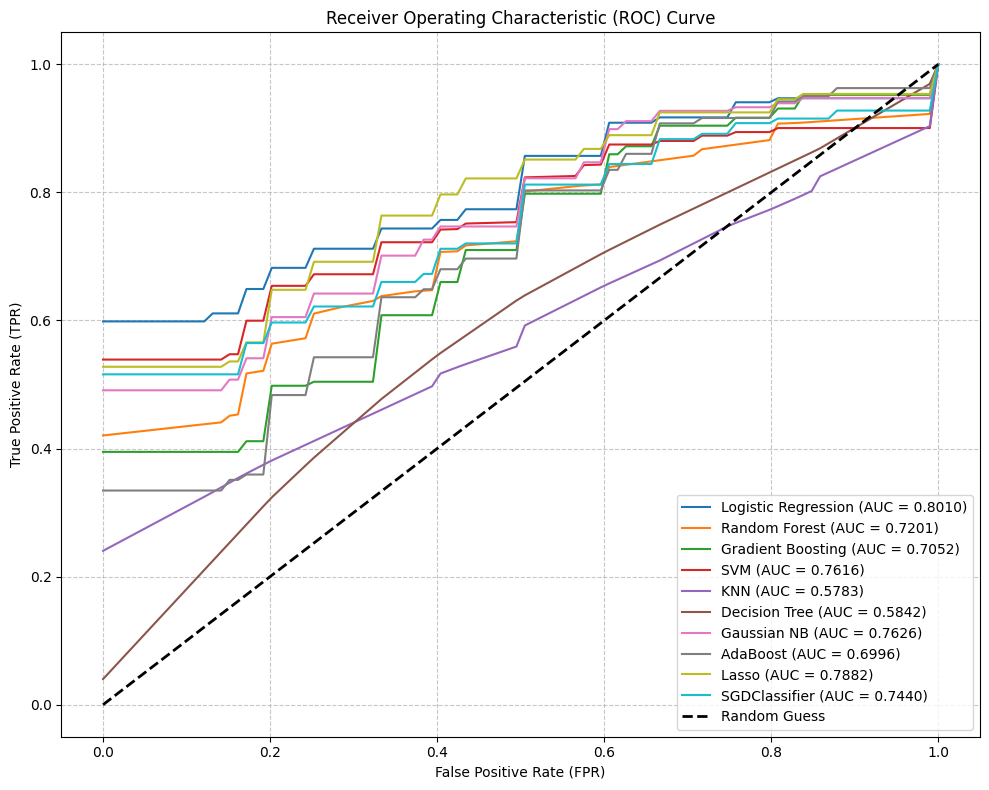

In [217]:
# Plotting ROC Curves for each model
plt.figure(figsize=(10, 8))
for model_name, (all_fpr, all_tpr) in model_roc_curves.items():
    mean_fpr = np.linspace(0, 1, 100)
    mean_tpr = np.zeros_like(mean_fpr)

    # Average TPR values for each unique FPR point
    for fpr, tpr in zip(all_fpr, all_tpr):
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
    mean_tpr /= len(all_fpr)

    plt.plot(mean_fpr, mean_tpr, label=f"{model_name} (AUC = {model_auc_scores[model_name][0]:.4f})")

# Adding a diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3.2 create pipeline for more complex models

In [219]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [218]:
# Create pipelines for the final models
pipelines = {
    'Logistic Regression': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', LogisticRegression(C=0.1, penalty='l2', random_state=42, max_iter=1000))
    ]),
    'Random Forest': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    'Gradient Boosting': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    'SVM': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', SVC(C=1.0, kernel='rbf', random_state=42, probability=True))
    ]),
    'KNN': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', KNeighborsClassifier(n_neighbors=5))
    ]),
    'Decision Tree': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', DecisionTreeClassifier(random_state=42))
    ]),
    'Gaussian NB': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', GaussianNB())
    ]),
    'AdaBoost': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', AdaBoostClassifier(n_estimators=100, random_state=42))
    ]),
    'Lasso': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', Lasso(alpha=0.1, random_state=42))
    ]),
    'SGDClassifier': Pipeline([
        ('scaler', StandardScaler()),
        ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))),
        ('pca', PCA(n_components=0.95, random_state=42)),
        ('model', SGDClassifier(max_iter=1000, tol=1e-3, random_state=42))
    ])
}

## 3.3 Comparasion between different penalty, folds, and parameter

In [222]:
from sklearn.model_selection import StratifiedKFold

penalties = ['l1', 'l2']
C_values = [0.01, 0.1, 1.0]
n_folds_options = [2, 5, 10, 20]
results = []

for n_folds in n_folds_options:
    folds = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    for penalty in penalties:
        for C in C_values:
            model_params = {'penalty': penalty, 'C': C, 'solver': 'liblinear', 'class_weight': 'balanced', 'max_iter': 10000}
            lr_model = LogisticRegression(**model_params)
            
            auc_scores = []
            for train_index, val_index in folds.split(X_train_scaled, y):
                X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
                y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]
                lr_model.fit(X_train_fold, y_train_fold)
                y_val_pred_prob = lr_model.predict_proba(X_val_fold)[:, 1]
                auc_scores.append(roc_auc_score(y_val_fold, y_val_pred_prob))
            
            mean_score = np.mean(auc_scores)
            result = {
                'n_folds': n_folds,
                'penalty': penalty,
                'C': C,
                'mean_roc_auc_score': mean_score
            }
            results.append(result)
            
            print(f"Processed: folds={n_folds}, penalty={penalty}, C={C}, Mean ROC AUC: {mean_score:.4f}")

Processed: folds=2, penalty=l1, C=0.01, Mean ROC AUC: 0.5000
Processed: folds=2, penalty=l1, C=0.1, Mean ROC AUC: 0.7181
Processed: folds=2, penalty=l1, C=1.0, Mean ROC AUC: 0.7244
Processed: folds=2, penalty=l2, C=0.01, Mean ROC AUC: 0.7147
Processed: folds=2, penalty=l2, C=0.1, Mean ROC AUC: 0.7056
Processed: folds=2, penalty=l2, C=1.0, Mean ROC AUC: 0.7011
Processed: folds=5, penalty=l1, C=0.01, Mean ROC AUC: 0.5000
Processed: folds=5, penalty=l1, C=0.1, Mean ROC AUC: 0.7736
Processed: folds=5, penalty=l1, C=1.0, Mean ROC AUC: 0.7997
Processed: folds=5, penalty=l2, C=0.01, Mean ROC AUC: 0.7976
Processed: folds=5, penalty=l2, C=0.1, Mean ROC AUC: 0.7854
Processed: folds=5, penalty=l2, C=1.0, Mean ROC AUC: 0.7681
Processed: folds=10, penalty=l1, C=0.01, Mean ROC AUC: 0.5000
Processed: folds=10, penalty=l1, C=0.1, Mean ROC AUC: 0.8049
Processed: folds=10, penalty=l1, C=1.0, Mean ROC AUC: 0.7819
Processed: folds=10, penalty=l2, C=0.01, Mean ROC AUC: 0.7694
Processed: folds=10, penalty=l

# 4. Basic Modeling Performance - whole training dataset

## 4.1 Basic Modelling

In [223]:
from mlxtend.classifier import StackingClassifier

all_classifiers = [
    LogisticRegression(C=0.1, penalty='l2', random_state=42, max_iter=1000),
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(n_estimators=100, random_state=42),
    SVC(C=1.0, kernel='rbf', random_state=42, probability=True),
    KNeighborsClassifier(n_neighbors=5),
    DecisionTreeClassifier(random_state=42),
    GaussianNB(),
    AdaBoostClassifier(n_estimators=100, random_state=42),
    Lasso(alpha=0.1, random_state=42),
    SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
]
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(C=1.0, kernel='rbf', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'SGDClassifier': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
}

In [224]:
train = pd.read_csv('/kaggle/input/dont-overfit-i/train.csv')
test = pd.read_csv('/kaggle/input/dont-overfit-i/test.csv')

y=train['target']
X=train.drop(["id", "target"], axis=1)
test = test.drop(["id"], axis=1)

X_train = X
X_test = test
y_train = y

scaler = StandardScaler()
X_train[X_train.columns[:-2]] = scaler.fit_transform(X_train[X_train.columns[:-2]])
X_test[X_train.columns[:-2]] = scaler.transform(X_test[X_train.columns[:-2]])

X_train.shape, X_test.shape, y_train.shape

((250, 300), (19750, 300), (250,))

In [ ]:
basic_predictions = {}

for model_name, pipeline in models.items():
    print(f"Training {model_name} on the entire dataset...")
    pipeline.fit(X_train, y_train)
    y_test_pred = pipeline.predict(X_test)
    basic_predictions[model_name] = y_test_pred

### stacking classifier and weight classifier

In [ ]:
# Perform weighted average of final predictions
weights = [1 for _ in range(len(basic_predictions))]  # Assign equal weights for simplicity
basic_predictions["Weighted"] = sum(np.array(pred) * weight for pred, weight in zip(basic_predictions.values(), weights)) / sum(weights)

In [ ]:
stacking_clf = StackingClassifier(classifiers=all_classifiers, meta_classifier=LogisticRegression())
print("Training Stacking Classifier with all classifiers on the entire dataset...")
stacking_clf.fit(X_train, y_train)

basic_predictions['Stacking'] = stacking_clf.predict_proba(X_test)[:, 1]

In [ ]:
print(basic_predictions)

In [ ]:
basic_pred_df = pd.DataFrame(basic_predictions)
basic_pred_df['id'] = submission['id']
basic_pred_df.head()

In [ ]:
basic_predictions['Lasso'] = np.where(basic_predictions['Lasso'] >= 0.5, 1, 0)
basic_predictions['Weighted'] = np.where(basic_predictions['Stacking'] >= 0.5, 1, 0)
basic_predictions['Stacking'] = np.where(basic_predictions['Stacking'] >= 0.5, 1, 0)
print(basic_predictions)

### 4.1.1 Model - Logistic Regression

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["Logistic Regression"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: LR 0.651

### 4.1.2 Model - Random Forest

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["Random Forest"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: RF 0.533

### 4.1.3 Model - Gradient Boosting

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["Gradient Boosting"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: GB 0.570

### 4.1.4 Model - SVM

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["SVM"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: SVM 0.595

### 4.1.5 Model - KNN

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["KNN"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: KNN 0.541

### 4.1.6 Model - Decision Tree

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["Decision Tree"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: DT 0.526

### 4.1.7 Model - Gaussian NB

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["Gaussian NB"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: GNB 0.578

### 4.1.8 Model - AdaBoost

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["AdaBoost"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: AB 0.602

### 4.1.9 Model - Lasso

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["Lasso"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: Lasso 0.530

### 4.1.10 Model - SGDClassifier

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["SGDClassifier"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: SGDC 0.639

### 4.1.11 - Average Weighted Prediction - Ensemble Methods  

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["Weighted"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: weighted 0.589

### 4.1.12 - Stacking classifier - Ensemble Methods

In [ ]:
# submission = pd.DataFrame({'id': submission['id'], 'target': basic_predictions["Stacking"]})
# submission.to_csv('/kaggle/working/submission.csv', index=False)

result: Stacking 0.589

## 4.2 Improved Models: feature selection, and 

In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data to normalize feature distributions
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Feature selection using RandomForest
feature_selector_rf = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
X_train_rf = feature_selector_rf.fit_transform(X_train_scaled, y_train)
X_val_rf = feature_selector_rf.transform(X_val_scaled)

# Feature selection using Lasso (L1-based feature selection)
feature_selector_lasso = SelectFromModel(Lasso(alpha=0.1, random_state=42))
X_train_lasso = feature_selector_lasso.fit_transform(X_train_scaled, y_train)
X_val_lasso = feature_selector_lasso.transform(X_val_scaled)

# Feature selection using Variance Threshold
from sklearn.feature_selection import VarianceThreshold
feature_selector_variance = VarianceThreshold(threshold=0.01)
X_train_variance = feature_selector_variance.fit_transform(X_train_scaled)
X_val_variance = feature_selector_variance.transform(X_val_scaled)

# Feature selection using Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000, random_state=42), n_features_to_select=10)
X_train_rfe = rfe_selector.fit_transform(X_train_scaled, y_train)
X_val_rfe = rfe_selector.transform(X_val_scaled)

# Use PCA to reduce dimensionality further, retaining 95% of variance
pca_rf = PCA(n_components=0.95, random_state=42)
X_train_pca_rf = pca_rf.fit_transform(X_train_rf)
X_val_pca_rf = pca_rf.transform(X_val_rf)

pca_lasso = PCA(n_components=0.95, random_state=42)
X_train_pca_lasso = pca_lasso.fit_transform(X_train_lasso)
X_val_pca_lasso = pca_lasso.transform(X_val_lasso)

pca_variance = PCA(n_components=0.95, random_state=42)
X_train_pca_variance = pca_variance.fit_transform(X_train_variance)
X_val_pca_variance = pca_variance.transform(X_val_variance)

pca_rfe = PCA(n_components=0.95, random_state=42)
X_train_pca_rfe = pca_rfe.fit_transform(X_train_rfe)
X_val_pca_rfe = pca_rfe.transform(X_val_rfe)

# Train multiple models and evaluate them
models = {
    'Logistic Regression': LogisticRegression(C=0.1, penalty='l2', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(C=1.0, kernel='rbf', random_state=42, probability=True),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Gaussian NB': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42),
    'Lasso': Lasso(alpha=0.1, random_state=42),
    'SGDClassifier': SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Store AUC scores for plotting
model_auc_scores = {}
feature_selection_methods = {
    'RandomForest': (X_train_pca_rf, X_val_pca_rf),
    'Lasso': (X_train_pca_lasso, X_val_pca_lasso),
    'VarianceThreshold': (X_train_pca_variance, X_val_pca_variance),
    'RFE': (X_train_pca_rfe, X_val_pca_rfe)
}

for feature_name, (X_train_pca, X_val_pca) in feature_selection_methods.items():
    print(f"Evaluating feature selection method: {feature_name}")
    for model_name, model in models.items():
        auc_scores = []
        for train_index, val_index in kf.split(X_train_pca):
            X_kf_train, X_kf_val = X_train_pca[train_index], X_train_pca[val_index]
            y_kf_train, y_kf_val = y_train.iloc[train_index], y_train.iloc[val_index]
            model.fit(X_kf_train, y_kf_train)
            if hasattr(model, 'predict_proba'):
                y_kf_val_pred_prob = model.predict_proba(X_kf_val)[:, 1]
            elif hasattr(model, 'decision_function'):
                y_kf_val_pred_prob = model.decision_function(X_kf_val)
            else:
                y_kf_val_pred_prob = model.predict(X_kf_val)  # Use predictions directly for models without probability or decision function
            auc_scores.append(roc_auc_score(y_kf_val, y_kf_val_pred_prob))
        mean_auc = np.mean(auc_scores)
        std_auc = np.std(auc_scores)
        model_auc_scores[f"{feature_name} - {model_name}"] = (mean_auc, std_auc)
        print(f"K-Fold ROC AUC Score ({feature_name} - {model_name}): {mean_auc:.4f} (+/- {std_auc:.4f})")

# Plotting K-Fold ROC AUC Scores
plt.figure(figsize=(10, 6))
model_names = list(model_auc_scores.keys())
mean_aucs = [model_auc_scores[name][0] for name in model_names]
std_aucs = [model_auc_scores[name][1] for name in model_names]

plt.barh(model_names, mean_aucs, xerr=std_aucs, color='skyblue', alpha=0.8)
plt.xlabel('Mean ROC AUC Score')
plt.title('K-Fold ROC AUC Score for Different Models')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 5. Submission & Performance Checking

## 5.1 submission score with basic modelling

In [ ]:
# leaderboard score with basic modelling
scores_base = {}
scores_base['LR'] = 0.651 # logistic regression
scores_base['RF'] = 0.533 # random forest
scores_base['GB'] = 0.570 # Gradient Boosting
scores_base['SVM'] = 0.595 
scores_base['KNN'] = 0.541
scores_base['DT'] = 0.526 # Decision Tree
scores_base['GNB'] = 0.578 # Gaussian NB
scores_base['AB'] = 0.602 #AdaBoost
scores_base['Lasso'] =  0.530
scores_base['SGDC'] = 0.639 # SGDClassifier
scores_base['Weighted'] = 0.589 # weighted prediction result
scores_base['Stack'] = 0.589 # Stacking

plt.figure(figsize=(12, 5))
plt.bar(range(len(scores_base)), list(scores_base.values()), label='Base Modeling', align='center', color='grey')
plt.title('Scores of Base Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(range(len(scores_base)), list(scores_base.keys()))
for a, b in zip(range(len(scores_base)), list(scores_base.values())):
    plt.text(a, b, '%.3f' % b, ha='center', va='bottom', fontsize=11)

plt.legend()
plt.show()

## 5.2 submission with feature selection

In [ ]:
# leaderboard score with

scores_top10 = {}
scores_top10['LR'] = 0.651 # logistic regression
scores_top10['RF'] = 0.533 # random forest
scores_top10['GB'] = 0.570 # Gradient Boosting
scores_top10['SVM'] = 0.595 
scores_top10['KNN'] = 0.541
scores_top10['DT'] = 0.526 # Decision Tree
scores_top10['GNB'] = 0.578 # Gaussian NB
scores_top10['AB'] = 0.602 #AdaBoost
scores_top10['Lasso'] =  0.530
scores_top10['SGDC'] = 0.639 # SGDClassifier